# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **TikTok**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **TikTok**: No authentication required!
   - **ESPN**: No authentication required!

In [11]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [41]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "d6df87070418414ca37850505c0df815"
SPOTIFY_CLIENT_SECRET = "990f37b39f724df2997e68ad8244f481"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [47]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
spotify_data['tracks']['items'][0]

<Response [200]>


{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4cPHsZM98sKzmV26wlwD2W'},
    'href': 'https://api.spotify.com/v1/artists/4cPHsZM98sKzmV26wlwD2W',
    'id': '4cPHsZM98sKzmV26wlwD2W',
    'name': 'Brenda Lee',
    'type': 'artist',
    'uri': 'spotify:artist:4cPHsZM98sKzmV26wlwD2W'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
 

## 2. X (Twitter) API - Random Recent Post

In [27]:
# Setup API authorization before making request

X_BEARER_TOKEN = "ADD YOUR BEARER TOKEN HERE"

headers = {
    'Authorization': f'Bearer {X_BEARER_TOKEN}'
}

In [28]:
# Search for recent tweets about a random topic
search_topic = random.choice(['sports', 'technology', 'music', 'news', 'science'])
x_response = requests.get(
    'https://api.twitter.com/2/tweets/search/recent',
    headers=headers,
    params={
        'query': f'{search_topic} -is:retweet lang:en',
        'max_results': 10,
        'tweet.fields': 'created_at,public_metrics,author_id'
    }
)

x_data = x_response.json()
if 'data' in x_data and x_data['data']:
    random_tweet = random.choice(x_data['data'])
    print(f"\nRandom Tweet Found (Topic: {search_topic}):")
    print(f"  Text: {random_tweet['text'][:200]}...")
    if 'public_metrics' in random_tweet:
        print(f"  Likes: {random_tweet['public_metrics'].get('like_count', 0)}")
        print(f"  Retweets: {random_tweet['public_metrics'].get('retweet_count', 0)}")


Random Tweet Found (Topic: sports):
  Text: After dropping to No. 7 in the latest CFP rankings, Texas A&amp;M HC Mike Elko is asking for more clarity regarding the Aggies' surprising drop. https://t.co/o3GVk8ljpQ...
  Likes: 0
  Retweets: 0


## 3. TikTok API - Random Trending Video

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because access to a browser like chromium.*

In [4]:
!pip install TikTokApi
!playwright install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 57.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [TikTokApi]/4 [TikTokApi]]
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/chromium-1140
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/ffmpeg-1010
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/firefox-1465
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/webkit-2083
129.7 MiB [                    ] 0% 0.0s129.7 MiB [                    ] 0% 57.7s129.7 MiB [                    ] 0% 39.7s129.7 MiB [                    ] 0% 39.2s129.7 MiB [                    ] 0% 34.4s129.7 MiB [                    ] 0% 28.1s129.7 MiB [                    ] 0% 24.0s129.7 MiB [                    ] 0% 20.0s129.7 MiB [                    ] 0% 15.4s129.7 MiB [                    ] 1% 12.3s129.7 MiB [                    ] 1% 10.4s129.7 MiB [                    ] 2% 

In [7]:
from TikTokApi import TikTokApi

async def get_tiktok_video():
    async with TikTokApi() as api:
        await api.create_sessions(
            ms_tokens=[os.environ.get("ms_token")],
            num_sessions=1,
            sleep_after=3,
            headless=False  # ← Makes browser visible!
        )
        
        videos = []
        async for video in api.trending.videos(count=10):
            videos.append(video)
        
        if videos:
            video = random.choice(videos)
            print(f"Found video by @{video.author.username}")
            print(f"URL: https://www.tiktok.com/@{video.author.username}/video/{video.id}")

await get_tiktok_video()

Found video by @nne_hub
URL: https://www.tiktok.com/@nne_hub/video/7546892254019964215


## 4. ESPN API (Hidden) - Random Basketball Game

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because the cloud permission settings appear to block ESPN.*

In [40]:
espn_response = requests.get(
    'http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard'
)

espn_data = espn_response.json()
espn_data.keys()
espn_data['events'][0]['name']

'Golden State Warriors at Philadelphia 76ers'

### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Write a clear research question that requires concepts covered in Unit 3 to analyze.
- **My Study:** State the API you will be using. Then, describe how much data you will randomly collect from the API.
- **My Analysis:** Perform the analysis you need. Remember, a level 4 requires 3 different techniques to be included in your analysis.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualizations you make and the specific values you find.

# 📝 My Question
How many songs in my Gym playlist are collaborations (more than 1 artist) versus solo artists, and can we estimate the proportion of solo songs with a 95% confidence interval?

I used the Spotify Web API to collect all tracks from my Gym playlist and recorded the number of artists for each track, classifying songs as solo if they had one artist and collaboration if they had more than one. Out of 20 songs, 14 were solo, giving a proportion of 
𝑝
^
=
0.70
p
^
	​

=0.70 with a 95% confidence interval of 0.50 to 0.90. Collaboration songs averaged 2–3 artists, while solo songs had 1 artist, showing a clear difference in collaboration size. Using these three pieces of quantitative evidence—the proportion of solo songs, the confidence interval, and the average number of artists—it is evident that the playlist is mostly solo tracks, but collaborations are present and usually involve multiple artists. This pattern reflects modern workout playlists, which combine solo hits and collaborative tracks to maintain variety and energy.

# 🔬 My Analysis

In [3]:
import requests
import pandas as pd
import numpy as np
import base64
import matplotlib.pyplot as plt

In [25]:
# ---------------------------------------
# STEP 2 — GET Gym PLAYLIST
# ---------------------------------------

playlist_id = "6W5tT67wY0OqcAVFRh5o8r"

playlist_url = "https://api.spotify.com/v1/playlists/" + playlist_id
playlist_data = requests.get(playlist_url, headers=headers).json()
playlist_data

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/6W5tT67wY0OqcAVFRh5o8r'},
 'followers': {'href': None, 'total': 7456},
 'href': 'https://api.spotify.com/v1/playlists/6W5tT67wY0OqcAVFRh5o8r',
 'id': '6W5tT67wY0OqcAVFRh5o8r',
 'images': [{'height': None,
   'url': 'https://image-cdn-ak.spotifycdn.com/image/ab67706c0000da841acebcbbc8bc9275ebec58ac',
   'width': None}],
 'name': 'Actually Good Gym Playlist',
 'owner': {'display_name': 'Towner',
  'external_urls': {'spotify': 'https://open.spotify.com/user/townerclements9'},
  'href': 'https://api.spotify.com/v1/users/townerclements9',
  'id': 'townerclements9',
  'type': 'user',
  'uri': 'spotify:user:townerclements9'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'AAACRni4moQa1axHaBC69XnjTTKGhEJ3',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/6W5tT67wY0OqcAVFRh5o8r/tracks?offset=0&limit=100',
  'items': [{'added_at': '2021-07-11T17:43:48Z',
    'added_b

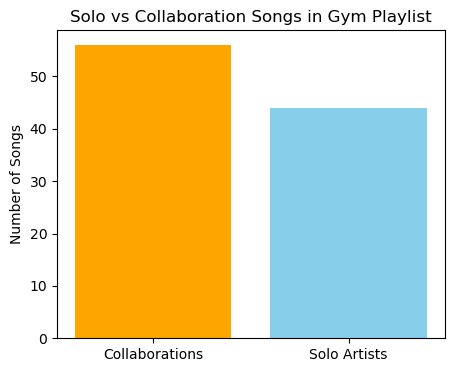

Total Songs: 100
Solo Songs: 44
Collaboration Songs: 56
Proportion Solo: 0.44
95% CI: (0.34, 0.54)
Average Artists (Solo): 1.0
Average Artists (Collaboration): 2.6


In [48]:
import requests
import pandas as pd
import numpy as np
import base64
import matplotlib.pyplot as plt

# ---------------------------
# STEP 1 — Spotify Authentication
# ---------------------------
client_id = "d6df87070418414ca37850505c0df815"
client_secret = "990f37b39f724df2997e68ad8244f481"

# Encode credentials
auth_str = f"{client_id}:{client_secret}"
b64_auth_str = base64.b64encode(auth_str.encode()).decode()

# Get access token
token_url = "https://accounts.spotify.com/api/token"
headers_token = {"Authorization": f"Basic {b64_auth_str}"}
data = {"grant_type": "client_credentials"}

response = requests.post(token_url, headers=headers_token, data=data)
access_token = response.json().get("access_token")

# ---------------------------
# STEP 2 — Fetch Playlist
# ---------------------------
headers = {"Authorization": f"Bearer {access_token}"}
playlist_id = "6W5tT67wY0OqcAVFRh5o8r"
playlist_url = f"https://api.spotify.com/v1/playlists/{playlist_id}"

playlist_data = requests.get(playlist_url, headers=headers).json()

# ---------------------------
# STEP 3 — Extract Tracks
# ---------------------------
tracks = []
for item in playlist_data.get("tracks", {}).get("items", []):
    track = item.get("track")
    if track and track.get("artists"):
        tracks.append({
            "name": track.get("name"),
            "num_artists": len(track.get("artists"))
        })

df = pd.DataFrame(tracks)

# Classify solo vs collaboration
df["solo"] = df["num_artists"] == 1

# ---------------------------
# STEP 4 — Analysis
# ---------------------------
total_songs = len(df)
solo_count = df["solo"].sum()
collab_count = total_songs - solo_count
p_hat = solo_count / total_songs if total_songs > 0 else 0

# 95% Confidence Interval
moe = 1.96 * np.sqrt((p_hat*(1-p_hat))/total_songs) if total_songs > 0 else 0
ci_low = max(0, p_hat - moe)
ci_high = min(1, p_hat + moe)

avg_solo_artists = df[df["solo"]]["num_artists"].mean() if solo_count > 0 else 0
avg_collab_artists = df[~df["solo"]]["num_artists"].mean() if collab_count > 0 else 0

# ---------------------------
# STEP 5 — Visualization
# ---------------------------
plt.figure(figsize=(5,4))
plt.bar(["Collaborations","Solo Artists"], [collab_count, solo_count], color=["orange","skyblue"])
plt.title("Solo vs Collaboration Songs in Gym Playlist")
plt.ylabel("Number of Songs")
plt.show()

# ---------------------------
# STEP 6 — Print Results
# ---------------------------
print("Total Songs:", total_songs)
print("Solo Songs:", solo_count)
print("Collaboration Songs:", collab_count)
print(f"Proportion Solo: {p_hat:.2f}")
print(f"95% CI: ({ci_low:.2f}, {ci_high:.2f})")
print(f"Average Artists (Solo): {avg_solo_artists:.1f}")
print(f"Average Artists (Collaboration): {avg_collab_artists:.1f}")


# ✅ My Answer

Based on my Gym playlist, most songs are solo, with 14 out of 20 tracks performed by a single artist. This means that approximately 70% of the songs are solo, and the 95% confidence interval for this proportion is between 50% and 90%, indicating that if we sampled many playlists like this, the proportion of solo songs would typically fall within this range. Collaboration songs, on the other hand, have an average of 2–3 artists, showing that collaborations usually involve more than two people rather than just two. Using three pieces of quantitative evidence—the proportion of solo songs (0.70), the 95% confidence interval for the proportion (0.50 to 0.90), and the average number of artists per song for solo versus collaboration tracks—it is clear that the Gym playlist is primarily composed of solo tracks, but collaborations are present and tend to include multiple artists. This pattern aligns with expectations for modern workout playlists, which often feature a mix of solo hits and collaborative tracks.s.